Import MDAnalysis Module (https://www.mdanalysis.org/) and Matplotlib <br/> 
Don't forget to add the permissions: <br/>
sudo jupyter-nbextension enable nglview --py --sys-prefix <br/>
sudo  jupyter-nbextension enable --py widgetsnbextension <br/>

In [1]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# no GM1

name = '_DPPC_DIPC_chol_352'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# name and files for the simulation studied LPT - no GM1

name = '_DPPC_DIPC_chol_352'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/sans_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

In [2]:
# name and files for the simulation studied LPT - 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/5_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1.xtc'

Load xtc and gro files using mda.Universe('struct file','traj file')

In [3]:
u = mda.Universe( path+fgro, path+fxtc)

In [4]:
sel_all = u.select_atoms("all")

In [5]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [6]:
# set the x and y min and max values

xmin=0
ymin=0
str_sel= "(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and (name PO4 or name GM1)"
patch = u.select_atoms(str_sel).positions
print(patch)


xmax = max(patch[:,0])
ymax = max(patch[:,1])
#dmax = int(min(xmax,ymax))
print(xmax)
print(ymax)

xmin = min(patch[:,0])
ymin = min(patch[:,1])

print(xmin)
print(ymin)

[[ 26.070002 393.04      73.04    ]
 [ 23.79     278.43      94.23    ]
 [ 44.32     197.87001   87.1     ]
 ...
 [132.79001  216.87      56.43    ]
 [258.23     323.2       32.4     ]
 [176.84     264.72003   54.480003]]
431.35004
431.34003
0.13
0.080000006


In [7]:
# divide the bilayer into 2 leaflets selecting the species you want

Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM1') # 
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

In [8]:
# set the number of boxes into which will be divided the membrane

N = 15
dx = (xmax-xmin)/N
dy = (ymax-ymin)/N
print(dx)
print(dy)

28.748002115885416
28.750669352213542


(225, 3)


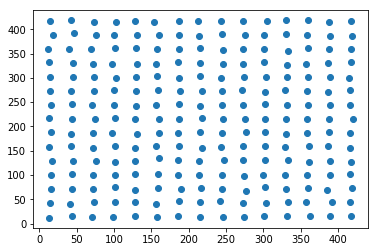

In [9]:
# leaflet 0
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary0 = []
#del Mphi0

Mphi0_Lo = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # barycenter of all molecules in each box
        str_sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        b0=leaflet0.select_atoms(str_sel).centroid().tolist()
        bary0.append(b0)
        
        # composition rates in each box
        sel_tot= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        tot0= leaflet0.select_atoms(sel_tot).positions
        n_tot0=len(tot0) # total number of molecules
        
        sel_totPC= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot0PC= leaflet0.select_atoms(sel_totPC).positions
        n_tot0PC=len(tot0PC) # total number of PC
        
        sel_Lo= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Lo0= leaflet0.select_atoms(sel_Lo).positions
        n_Lo0=len(Lo0) # number of molecules of the Lo phase (DPPC here)
         
        phi0_Lo=n_Lo0/n_tot0PC
        
        Mphi0_Lo[i,j]=phi0_Lo
        
bary0=np.array(bary0)

plt.scatter(bary0[:,0],bary0[:,1])

print(np.shape(bary0))

(225, 3)


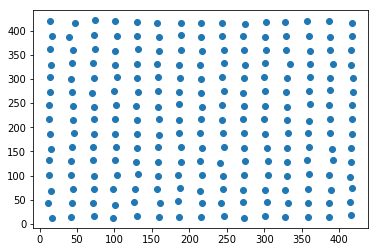

In [10]:
# leaflet 1
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary1 = []
#del Mphi1
Mphi1_Lo = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # barycenter of all molecules in each box
        str_sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        b1=leaflet1.select_atoms(str_sel).centroid().tolist()
        bary1.append(b1)
        
        # composition rates in each box
        sel_tot= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot1= leaflet1.select_atoms(sel_tot).positions
        n_tot1=len(tot1) # total number of molecules
        
        sel_totPC= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot1PC= leaflet1.select_atoms(sel_totPC).positions
        n_tot1PC=len(tot1PC) # total number of PC
        
        sel_Lo= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Lo1= leaflet1.select_atoms(sel_Lo).positions
        n_Lo1=len(Lo1) # number of molecules of the Lo phase (DPPC here)
        
        sel_Ld= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DIPC"
        Ld1= leaflet1.select_atoms(sel_Ld).positions
        n_Ld1=len(Ld1) # number of molecules of the Ld phase (DIPC here)
        
        sel_GM1= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and name GM1"
        GM1_1= leaflet1.select_atoms(sel_GM1).positions
        n_GM1_1=len(GM1_1) # number of GM1 molecules
        
        
        phi1_Lo=n_Lo1/n_tot1PC
        
        Mphi1_Lo[i,j]=phi1_Lo
        
bary1=np.array(bary1)

plt.scatter(bary1[:,0],bary1[:,1])

print(np.shape(bary1))

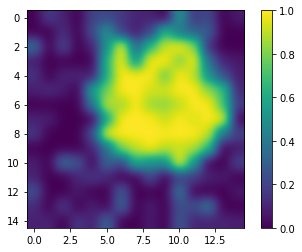

In [11]:
# DPPC / (DPPC+DIPC) leaflet 0
plt.imshow(Mphi0_Lo, interpolation='gaussian')
plt.colorbar()

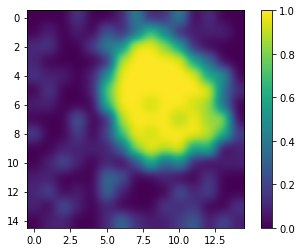

In [12]:
# DPPC / (DPPC+DIPC) leaflet 1
plt.imshow(Mphi1_Lo, interpolation='gaussian')
plt.colorbar()

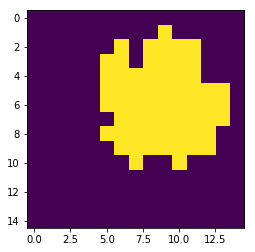

In [13]:
# upper leaflet binary composition

threshold = 0.6 # composition threshold from which the box is considered Lo, below it is considered Ld

Mphi0_bin = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if Mphi0_Lo[i,j]>= threshold :
            Mphi0_bin[i,j]=1


#print(Mphi0_bin)          

plt.imshow(Mphi0_bin)

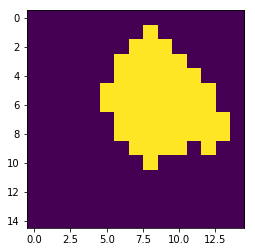

In [14]:
# lower leaflet binary composition

threshold = 0.6 # composition threshold from which the box is considered Lo, below it is considered Ld

Mphi1_bin = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if Mphi1_Lo[i,j]>= threshold :
            Mphi1_bin[i,j]=1


#print(Mphi1_bin)          

plt.imshow(Mphi1_bin)

In [15]:
print(Mphi0_bin)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
nb_Lo = int(np.sum(Mphi0_bin))
print(nb_Lo)

coords_Lo = np.zeros((nb_Lo,2))
l = 0

for i in range(N):
    for j in range(N):
        if Mphi0_bin[i,j]==1 :
            coords_Lo[l][0]=i
            coords_Lo[l][1]=j
            l += 1
#print(coords_Lo)
box_x_mean = np.mean(coords_Lo[:,0])
box_y_mean = np.mean(coords_Lo[:,1])
print(box_x_mean)
print(box_y_mean)

box_x_max = 0
box_y_max = 0

for i in range(N):
    for j in range(N):
        if Mphi0_bin[i,j]==1 and np.abs(i-box_x_mean) > box_x_max:
            box_x_max = np.abs(i-box_x_mean)
        if Mphi0_bin[i,j]==1 and np.abs(j-box_y_mean) > box_y_max:
            box_y_max = np.abs(j-box_y_mean)
print(box_x_max)
print(box_y_max)
box_max = np.ceil(max(box_x_max,box_y_max))
print(box_max)

62
5.790322580645161
8.774193548387096
4.790322580645161
4.225806451612904
5.0


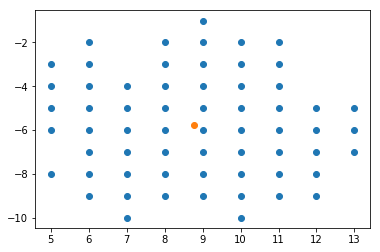

In [17]:
plt.scatter(coords_Lo[:,1], -coords_Lo[:,0])
plt.scatter(box_y_mean, -box_x_mean)

In [74]:
x_mean = box_x_mean /N * (xmax-xmin)
y_mean = box_y_mean /N * (ymax-ymin)
r_max = box_max /N * (ymax-ymin) *1.2
print(x_mean)
print(y_mean)
print(r_max)

166.51039048061574
252.31072538642468
172.53601074218747


In [75]:
# leaflet 0
# divide the leaflet into a pie  and calculate the concentration ratio in each box

xmin=0
ymin=0
str_sel= "(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and (name PO4 or name GM1)"
M = leaflet0.select_atoms(str_sel).positions
x = M[:,0]
y = M[:,1]

nb_r = 8
dr = int(r_max/nb_r)
r_crown = 0

x0 = x_mean
y0 = 1

x_pie_r = [[] for r in range(nb_r)]
y_pie_r = [[] for r in range(nb_r)]

nb_theta = 12
dtheta = 2*np.pi/nb_theta

x_pie_theta = [[] for t in range(nb_theta)]
y_pie_theta = [[] for t in range(nb_theta)]


for r in range(nb_r):

    x_r = []
    y_r = []
    
    r_crown = r_crown+dr
    
    for i in range(len(M)):
        xi = M[i,0]
        yi = M[i,1]

        if (xi-x_mean)**2+(yi-y_mean)**2 < r_crown**2 and (xi-x_mean)**2+(yi-y_mean)**2 >= (r_crown-dr)**2:
            x_r.append(xi)
            y_r.append(yi)
        
    x_pie_r[r] = x_r
    y_pie_r[r] = y_r
    

for i in range(len(M)):
    xi = M[i,0]
    yi = M[i,1]
    
    theta = np.arccos((x0*(xi-x_mean)+y0*(yi-y_mean))/np.sqrt(x0**2+y0**2)/np.sqrt((xi-x_mean)**2+(yi-y_mean)**2)) 
    t = int(np.floor(theta/dtheta))
    if xi < x_mean : # if angle > pi
        t = t + int(nb_theta/2)
    print(t)
    x_pie_theta[t].append(xi)
    y_pie_theta[t].append(yi)


10
11
11
2
2
10
11
11
9
1
0
1
1
9
10
0
0
10
1
9
10
0
0
9
1
2
1
9
9
0
0
10
9
2
1
2
9
10
10
10
1
1
2
0
10
0
0
1
11
10
11
1
1
3
0
1
1
10
1
11
1
1
0
0
1
1
10
2
9
2
0
0
2
2
1
10
1
1
11
2
2
2
1
1
1
0
0
0
9
10
9
1
1
9
10
2
0
2
1
2
9
2
10
0
2
2
9
9
1
11
10
1
9
0
2
0
1
10
9
0
10
1
1
1
1
1
10
0
9
0
10
9
10
1
1
0
10
2
2
0
1
0
0
0
10
2
10
2
10
0
1
1
11
0
9
11
0
1
11
1
2
10
0
0
9
2
0
0
11
2
10
9
1
9
0
11
1
2
1
10
1
10
10
0
10
9
1
1
10
1
1
1
0
9
0
1
9
2
0
1
0
1
1
0
2
9
10
9
9
2
10
9
0
0
0
11
0
0
9
9
0
9
0
1
1
2
1
10
2
1
2
0
2
1
9
9
9
1
9
10
10
0
11
1
9
9
2
0
0
0
9
0
0
1
2
2
11
0
9
1
2
9
1
10
10
1
10
10
10
1
1
1
1
1
9
1
0
1
0
0
11
1
9
0
9
0
0
0
2
1
2
2
0
1
0
0
9
1
10
9
1
0
9
0
1
1
10
0
0
9
0
1
9
0
10
10
9
0
1
1
10
0
10
9
10
9
9
11
10
9
10
1
10
10
9
0
2
10
0
10
0
0
1
0
10
1
11
10
0
0
10
2
9
1
1
2
9
0
9
10
10
1
1
9
2
1
9
1
0
0
1
10
1
1
1
9
9
2
1
0
1
2
0
9
9
9
0
9
11
1
2
10
0
0
1
9
10
1
9
0
0
11
10
0
1
2
2
1
11
9
9
11
2
1
0
9
1
11
2
2
2
10
9
10
0
1
9
0
1
0
9
1
2
1
0
0
0
11
0
1
0
0
10
0
10
0
2
0
0
10
1
1

(-21.51023538082796,
 452.64132114161316,
 -21.137677559480235,
 452.82769710741945)

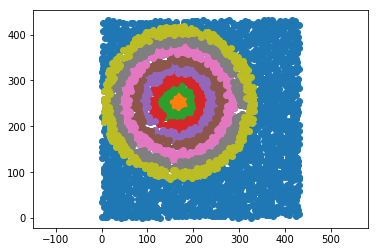

In [76]:
plt.scatter(x,y)

for r in range(nb_r):
    plt.scatter(x_pie_r[r], y_pie_r[r])
    
#for t in range(1):
    #plt.scatter(x_pie_theta[t], y_pie_theta[t])
    
plt.axis('equal')